[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%204/Leçon_4_Demo_reh.ipynb)

# ELE8812 - Traitement fréquentielle

## Démo : Rehaussement par masquage flou

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


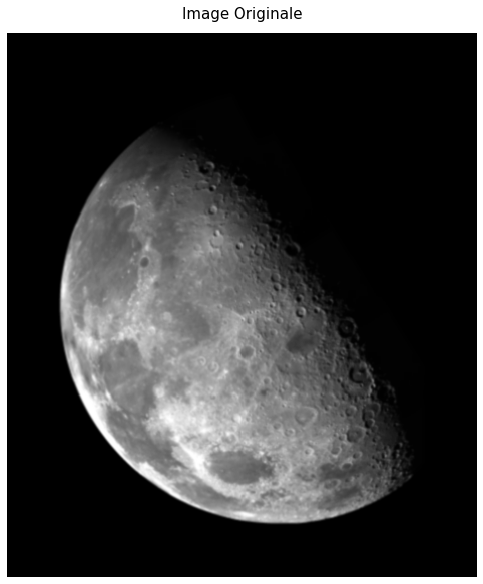

In [ ]:
# Charger image
A = np.double(plt.imread('Repo/Data/Lune.tif'));
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

In [ ]:
def filtpb_gauss(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]       

## Fréquence de coupure

In [ ]:
fc_slider = widgets.IntSlider(min=1, max=200, step=1, description='fc:', readout=True,)
display(fc_slider)

IntSlider(value=1, description='fc:', max=200, min=1)

## Facteur de rehaussement

In [ ]:
reh_slider = widgets.FloatSlider(min=0, max=20, step=1, description='alpha:', readout=True,)
display(reh_slider)

FloatSlider(value=0.0, description='alpha:', max=20.0, step=1.0)

## Réhaussement par masquage flou

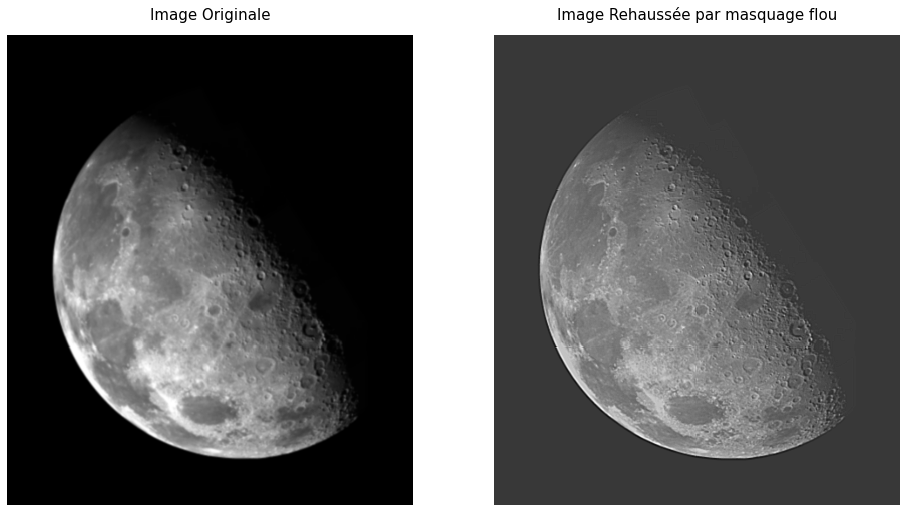

In [ ]:
fc=fc_slider.value
alpha=reh_slider.value

B=A+alpha*(A-filtpb_gauss(A,fc,pad=0))

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off');
plt.subplot(122); plt.imshow(B, cmap='gray'); plt.title('Image Rehaussée par masquage flou'); plt.axis('off'); plt.show();